In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Loading data

Training data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
# printing first 3 train samples
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Testing data

In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
# printing first 3 testing samples
test_data.head(3)
ID_column = test_data["PassengerId"]

In [5]:
# training dataset info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data preprocessing

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


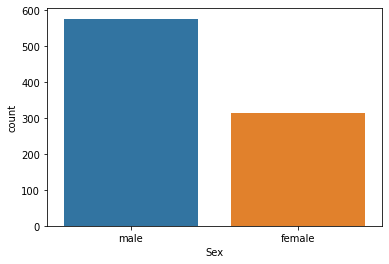

male      577
female    314
Name: Sex, dtype: int64

In [6]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Sex data visualization
g = sns.countplot(train_data['Sex'])
g.set_xticklabels(['male','female'])
plt.show()
# Sex info
train_data.Sex.value_counts()

In [7]:
# checking missing train data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# checking missing test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Imputing missing data**

In [9]:
from sklearn.impute import SimpleImputer
# using mean value for filling null data
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data['Age'] = imp.fit_transform(train_data[['Age']])
test_data['Age'] = imp.fit_transform(test_data[['Age']])
test_data['Fare'] = imp.fit_transform(test_data[['Fare']])
train_data.Cabin = train_data.Cabin.fillna('NA')  ### becasuse there are a lot of missing data
imp_object = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_data['Embarked'] = imp_object.fit_transform(train_data[['Embarked']])
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Encoding categorical features**

In [10]:
from sklearn.preprocessing import OneHotEncoder
train_data['Sex'] = OneHotEncoder().fit_transform(train_data[['Sex']]).toarray()[:,1]
test_data['Sex'] = OneHotEncoder().fit_transform(test_data[['Sex']]).toarray()[:,1]
train_data[['C', 'Q', 'S']] = OneHotEncoder().fit_transform(train_data[['Embarked']]).toarray()
test_data[['C', 'Q', 'S']] = OneHotEncoder().fit_transform(test_data[['Embarked']]).toarray()
train_data = train_data.drop(columns = ['Embarked', 'Name', 'Ticket', 'PassengerId', 'Cabin'])
test_data = test_data.drop(columns = ['Embarked', 'Name', 'Ticket', 'PassengerId', 'Cabin'])
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1.0,22.000000,1,0,7.2500,0.0,0.0,1.0
1,1,1,0.0,38.000000,1,0,71.2833,1.0,0.0,0.0
2,1,3,0.0,26.000000,0,0,7.9250,0.0,0.0,1.0
3,1,1,0.0,35.000000,1,0,53.1000,0.0,0.0,1.0
4,0,3,1.0,35.000000,0,0,8.0500,0.0,0.0,1.0
5,0,3,1.0,29.699118,0,0,8.4583,0.0,1.0,0.0
6,0,1,1.0,54.000000,0,0,51.8625,0.0,0.0,1.0
7,0,3,1.0,2.000000,3,1,21.0750,0.0,0.0,1.0
8,1,3,0.0,27.000000,0,2,11.1333,0.0,0.0,1.0
9,1,2,0.0,14.000000,1,0,30.0708,1.0,0.0,0.0


**Standardization and Normalization**

In [11]:
from sklearn.preprocessing import StandardScaler, Normalizer
col_names = ['Age', 'Fare']
features_train = train_data[col_names]
features_test = test_data[col_names]
features_train = StandardScaler().fit_transform(features_train.values)
features_test = StandardScaler().fit_transform(features_test.values)
train_data[col_names] = features_train
test_data[col_names] = features_test
features_train = train_data[col_names]
features_test = test_data[col_names]
features_train = Normalizer(norm="max").fit_transform(features_train.values)
features_test = Normalizer(norm="max").fit_transform(features_test.values)
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1.0,-0.592481,1,0,-0.502445,0.0,0.0,1.0
1,1,1,0.0,0.638789,1,0,0.786845,1.0,0.0,0.0
2,1,3,0.0,-0.284663,0,0,-0.488854,0.0,0.0,1.0
3,1,1,0.0,0.407926,1,0,0.420730,0.0,0.0,1.0
4,0,3,1.0,0.407926,0,0,-0.486337,0.0,0.0,1.0


**Data splitting**

In [12]:
# excluding survived column for training and verification
X = train_data.iloc[:, train_data.columns != 'Survived'] 
y = train_data.iloc[:, train_data.columns == 'Survived']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, \
    train_size=0.75, random_state = 0)

# Model deployment

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

**Evaluation**

In [15]:
y_pred = classifier.predict(X_valid)
y_test = pd.Series(classifier.predict(test_data), name="Survived")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f"f1 score is:{f1_score(y_valid, y_pred, average='binary')} \
    \naccuracy score is: {accuracy_score(y_valid, y_pred)} \
    \nprecision score is: {precision_score(y_valid, y_pred)} \
    \nrecal score is: {recall_score(y_valid, y_pred)}") 

f1 score is:0.7662337662337664     
accuracy score is: 0.8385650224215246     
precision score is: 0.8676470588235294     
recal score is: 0.686046511627907


**Confusion Matrix**

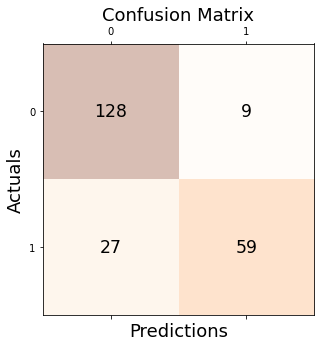

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large') 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Saving data

In [17]:
results = pd.concat([ID_column, y_test], axis=1)
# df = pd.DataFrame(data=d)
results.to_csv('submission.csv', index=False)